<a href="https://colab.research.google.com/github/kyook17/UIUC_BADM/blob/main/Missing_Value_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imputation for Numerical and Categorical variables**

Sklearn:
* Simple Imputer - This applies to all columns
* Column Transformer - Allows us to select specific columns

[Simple Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer.set_params)

[Column Transformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

The notebook has three main sections:



Section 1 **Imputation for Numeric Variables**


- > Mean Value Imputation


- > Median Value Imputation



- > Constant Value (Arbitary Value) Imputation

- > Multivariate Imputaion: KNN and MICE




Section 2 **Imputation for Categorical Variables**


- > Frequent Value (Category) Value Imputation


- > Constant Value ("missing" string) Imputation



Section 3 **Adding Missing Indicator**




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# transformers to impute missing data with sklearn:

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# to split the datasets
from sklearn.model_selection import train_test_split

## Numerical Columns

* Mean Imputation

* Median Imputation

* Constant Value Imputation

* Separate Imputation for specific columns

* Adding Missing Indicator

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ashish-cell/BADM-211-FA21/main/Data/mpg.csv")

In [ ]:
df.shape

(398, 9)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70,usa,ford torino


In [ ]:
df.isnull().sum()

mpg             3
cylinders       2
displacement    2
horsepower      8
weight          1
acceleration    0
model_year      0
origin          8
name            0
dtype: int64

### Mean Value Imputation

In [ ]:
X = df.drop(columns = ["mpg"])

y = df["mpg"]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
train_X.isnull().sum()

cylinders       0
displacement    2
horsepower      6
weight          1
acceleration    0
model_year      0
origin          7
name            0
dtype: int64

In [ ]:
test_X.isnull().sum()

cylinders       2
displacement    0
horsepower      2
weight          0
acceleration    0
model_year      0
origin          1
name            0
dtype: int64

`Cylinder` did not get `missing values` in training but got in testing data.

We identify the columns as categorical and numerical like this.

In [ ]:
df.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [ ]:
cat_vars = [var for var in train_X.columns if train_X[var].dtype == 'O'] # we will need this list later

num_vars = [var for var in train_X.columns if train_X[var].dtype != 'O'] # we will need this list later

print(f"The list of categorical columns: {cat_vars}")

print(f"The list of numerical columns: {num_vars}")

The list of categorical columns: ['origin', 'name']
The list of numerical columns: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


#### Mean imputation of numeric columns

In [ ]:
train_X_num = train_X[num_vars]

test_X_num = test_X[num_vars]

In [ ]:
train_X_num.isnull().sum()

cylinders       0
displacement    2
horsepower      6
weight          1
acceleration    0
model_year      0
dtype: int64

In [ ]:
test_X_num.isnull().sum()

cylinders       2
displacement    0
horsepower      2
weight          0
acceleration    0
model_year      0
dtype: int64

In [ ]:
mean_imputer = SimpleImputer(strategy = "mean")

In [ ]:
mean_imputer.fit(train_X_num) # When we do the fit, it learns from the data.

SimpleImputer()

In [ ]:
mean_imputer.statistics_ # This shows the learned statistics (means) for numeric columns


array([   5.43081761,  191.21993671,  103.33333333, 2971.66246057,
         15.63993711,   76.10377358])

Let's check if these match the mean values.

In [ ]:
train_X_num.mean()

cylinders          5.430818
displacement     191.219937
horsepower       103.333333
weight          2971.662461
acceleration      15.639937
model_year        76.103774
dtype: float64

Applying the learned transformations on the train and test datasets

In [ ]:
train_X_num_t = mean_imputer.transform(train_X_num)

test_X_num_t = mean_imputer.transform(test_X_num)

In [ ]:
type(train_X_num_t) # The transformed object has become a numpy array. We will convert into a Pandas dataframe back


numpy.ndarray

In [ ]:
train_X_num_t = pd.DataFrame(train_X_num_t)

In [ ]:
train_X_num_t.head() # column names gone

,0,1,2,3,4,5
0,8.0,304.0,150.000000,3433.000000,12.0,70.0
1,4.0,97.0,103.333333,2971.662461,14.5,70.0
2,4.0,91.0,68.000000,2025.000000,18.2,82.0
3,4.0,91.0,60.000000,1800.000000,16.4,78.0
4,4.0,115.0,95.000000,2694.000000,15.0,75.0


In [ ]:
num_vars # we have the column names, we wiil use them to rename the columns of the transformed dataset

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year']

In [ ]:
train_X_num_t.columns = num_vars # rename the columns of the transformed dataset

In [ ]:
type(train_X_num) # converted back to the dataframe with the column names retained

pandas.core.frame.DataFrame

In [ ]:
train_X_num_t.head() # column names gone

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8.0,304.0,150.000000,3433.000000,12.0,70.0
1,4.0,97.0,103.333333,2971.662461,14.5,70.0
2,4.0,91.0,68.000000,2025.000000,18.2,82.0
3,4.0,91.0,60.000000,1800.000000,16.4,78.0
4,4.0,115.0,95.000000,2694.000000,15.0,75.0


Check missing values in train data

In [ ]:
train_X_num_t.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

All values have bee successfully imputed using the **MEAN** value for respective columns.

### Median Value Imputation


In [ ]:
X = df.drop(columns = ["mpg"])

y = df["mpg"]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

We identify the columns as categorical and numerical like this.

In [ ]:
cat_vars = [var for var in train_X.columns if train_X[var].dtype == 'O'] # we will need this list later

num_vars = [var for var in train_X.columns if train_X[var].dtype != 'O'] # we will need this list later

print(f"The list of categorical columns: {cat_vars}")

print(f"The list of numerical columns: {num_vars}")

The list of categorical columns: ['origin', 'name']
The list of numerical columns: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


#### Median imputation of numeric columns

In [ ]:
train_X_num = train_X[num_vars]

test_X_num = test_X[num_vars]

In [ ]:
train_X_num.isnull().sum()

cylinders       0
displacement    2
horsepower      6
weight          1
acceleration    0
model_year      0
dtype: int64

In [ ]:
median_imputer = SimpleImputer(strategy = "median")

In [ ]:
median_imputer.fit(train_X_num)

SimpleImputer(strategy='median')

In [ ]:
median_imputer.statistics_ # This shows the MEDIAN values for numeric columns


array([   4. ,  146. ,   92. , 2830. ,   15.5,   76. ])

In [ ]:
train_X_num.median()

cylinders          4.0
displacement     146.0
horsepower        92.0
weight          2830.0
acceleration      15.5
model_year        76.0
dtype: float64

In [ ]:
train_X_num = median_imputer.transform(train_X_num)

test_X_num = median_imputer.transform(test_X_num)

In [ ]:
type(train_X_num) # The transformed object has become a numpy array. We will convert into a Pandas dataframe back


numpy.ndarray

In [ ]:
train_X_num = pd.DataFrame(train_X_num)

In [ ]:
train_X_num.head() # column names gone

,0,1,2,3,4,5
0,8.0,304.0,150.0,3433.0,12.0,70.0
1,4.0,97.0,92.0,2830.0,14.5,70.0
2,4.0,91.0,68.0,2025.0,18.2,82.0
3,4.0,91.0,60.0,1800.0,16.4,78.0
4,4.0,115.0,95.0,2694.0,15.0,75.0


In [ ]:
num_vars

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year']

In [ ]:
train_X_num.columns = num_vars

In [ ]:
type(train_X_num) # converted back to the dataframe with the column names retained

pandas.core.frame.DataFrame

In [ ]:
train_X_num.head() # column names gone

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8.0,304.0,150.0,3433.0,12.0,70.0
1,4.0,97.0,92.0,2830.0,14.5,70.0
2,4.0,91.0,68.0,2025.0,18.2,82.0
3,4.0,91.0,60.0,1800.0,16.4,78.0
4,4.0,115.0,95.0,2694.0,15.0,75.0


In [ ]:
train_X_num.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

All values have bee successfully imputed using the **MEDIAN** value for respective columns.

### Mean and Median Imputation - Different transformations for different columns

We can decide to do mean imputation for some and median imputation for other variables.

We do this based on the distribution:
* Normal distribution - Mean Imputation
* Skewed distribution - Median Imputation

In [ ]:
X = df.drop(columns = ["mpg"])

y = df["mpg"]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

We identify the columns as categorical and numerical like this.

In [ ]:
cat_vars = [var for var in train_X.columns if train_X[var].dtype == 'O'] # we will need this list later

num_vars = [var for var in train_X.columns if train_X[var].dtype != 'O'] # we will need this list later

print(f"The list of categorical columns: {cat_vars}")

print(f"The list of numerical columns: {num_vars}")

The list of categorical columns: ['origin', 'name']
The list of numerical columns: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


In [ ]:
train_X_num = train_X[num_vars]

test_X_num = test_X[num_vars]

In [ ]:
train_X_num.isnull().sum() # cylinder does not have missing value in the train

cylinders       0
displacement    2
horsepower      6
weight          1
acceleration    0
model_year      0
dtype: int64

In [ ]:
test_X_num.isnull().sum() # # cylinder does have missing value in the test

cylinders       2
displacement    0
horsepower      2
weight          0
acceleration    0
model_year      0
dtype: int64

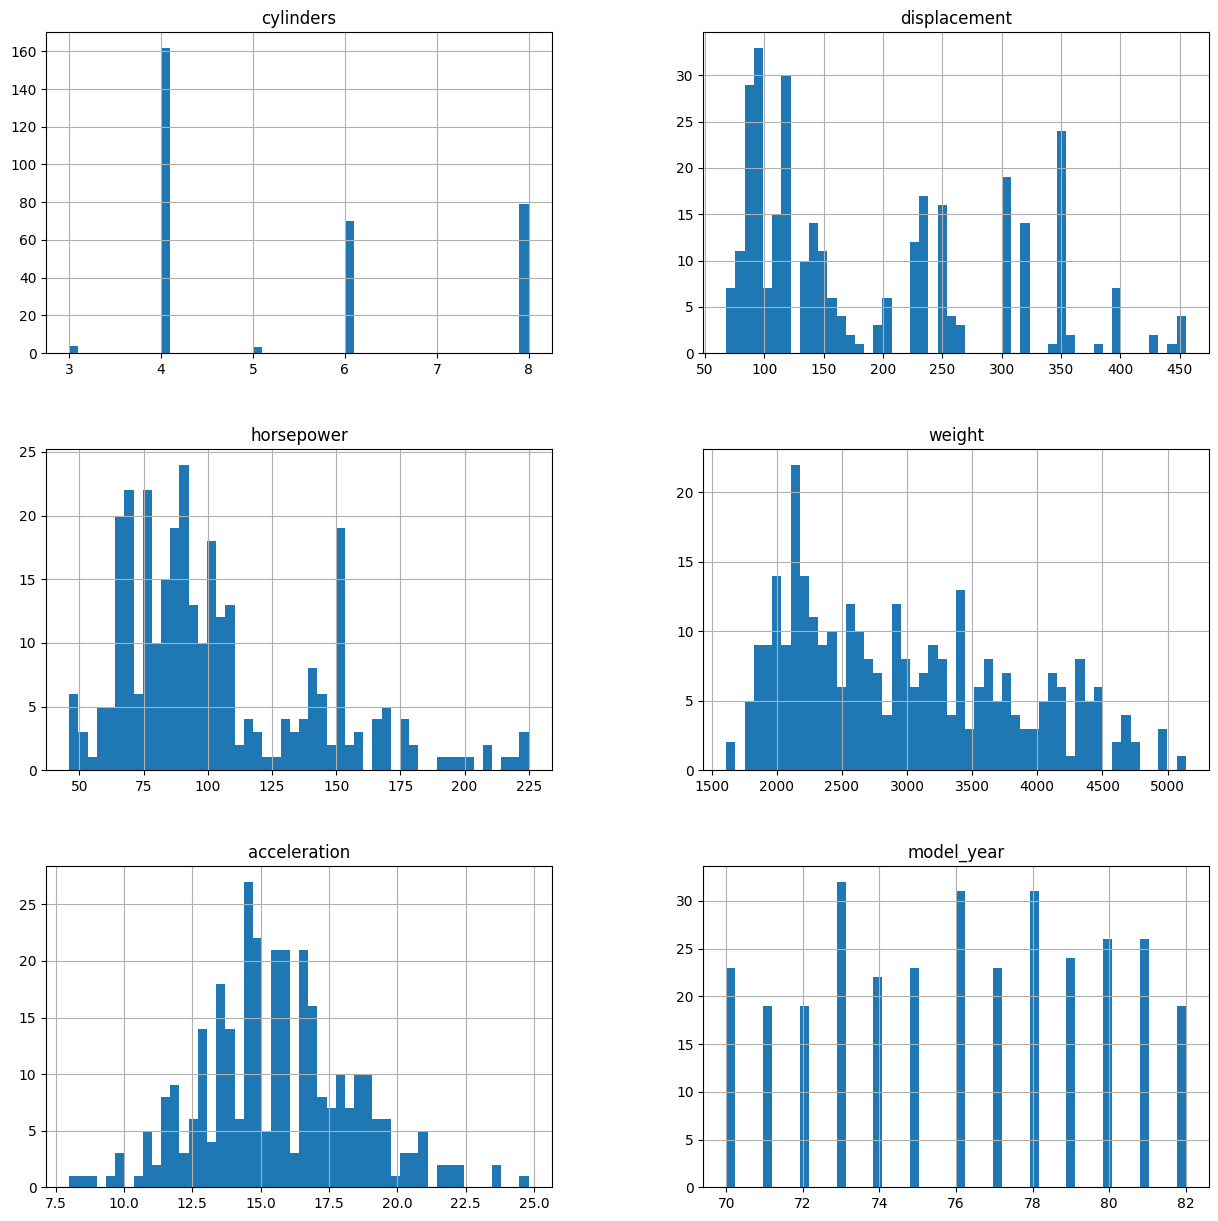

In [ ]:
train_X_num.hist(bins= 50, figsize=(15,15))

plt.show()

We will use `median` for `Cylinder` and `model_year` and `mean` for all others.

**Simple Imputer** does not allow specifying different imputation for different columns.

Thus, we will use **Column Transformer**

Column Transfromer takes
List of transformers (imputers)
Each transformer is tuple ("name", "strategy", list_of_columns_to_use)



In [ ]:
train_X_num.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year'],
      dtype='object')

In [ ]:
ct = ColumnTransformer(
    transformers = [ # list starts
      ("mean_imputer", SimpleImputer(strategy = "mean"), ['displacement', 'horsepower', 'weight', 'acceleration']), # Tuple for 1st transformer
      ("median_imputer", SimpleImputer(strategy = "median"), ['cylinders','model_year'])], # Tuple for 2nd transformer
       remainder="passthrough").set_output(transform="pandas")


In [ ]:
ct.fit(train_X)  # Fitting the transformer on the train dataset.

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer', SimpleImputer(),
                                 ['displacement', 'horsepower', 'weight',
                                  'acceleration']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['cylinders', 'model_year'])])

In [ ]:
print(ct.named_transformers_["mean_imputer"].statistics_)

print(ct.named_transformers_["median_imputer"].statistics_)

[ 191.21993671  103.33333333 2971.66246057   15.63993711]
[ 4. 76.]


In [ ]:
train_X_num.agg(["mean", "median"])

,cylinders,displacement,horsepower,weight,acceleration,model_year
mean,5.430818,191.219937,103.333333,2971.662461,15.639937,76.103774
median,4.000000,146.000000,92.000000,2830.000000,15.500000,76.000000


In [ ]:
train_X = ct.transform(train_X)

test_X = ct.transform(test_X)

In [ ]:
type(train_X) # The transformed object remains a DataFrame so we need not worry about converting them. However, the column names chnaged. if we want, we can rename them again


In [ ]:
train_X.isnull().sum()

mean_imputer__displacement    0
mean_imputer__horsepower      0
mean_imputer__weight          0
mean_imputer__acceleration    0
median_imputer__cylinders     0
median_imputer__model_year    0
remainder__origin             7
remainder__name               0
dtype: int64

In [ ]:
train_X.columns = X.columns

In [ ]:
train_X.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          7
name            0
dtype: int64

In [ ]:
test_X.isnull().sum()

mean_imputer__displacement    0
mean_imputer__horsepower      0
mean_imputer__weight          0
mean_imputer__acceleration    0
median_imputer__cylinders     0
median_imputer__model_year    0
remainder__origin             1
remainder__name               0
dtype: int64

### Constant Value Imputation

Sometimes, we want to fill all NAs in a column by a constant value.

The logic for this approach (and against the mean/ median value imputation): The imputed values blend into the original value, giving the model false pretense of knowing them. When we use an arbitray value, it acts as a flag for the model to know that this value was missing.

#### Same constant value for all columns

Let's say we want to impute missing values in all columns as 999

In [ ]:
X = df.drop(columns = ["mpg"])

y = df["mpg"]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

We identify the columns as categorical and numerical like this.

In [ ]:
cat_vars = [var for var in train_X.columns if train_X[var].dtype == 'O'] # we will need this list later

num_vars = [var for var in train_X.columns if train_X[var].dtype != 'O'] # we will need this list later

print(f"The list of categorical columns: {cat_vars}")

print(f"The list of numerical columns: {num_vars}")

The list of categorical columns: ['origin', 'name']
The list of numerical columns: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


Contsant Value "999" imputation of numeric columns

In [ ]:
train_X_num = train_X[num_vars]

test_X_num = test_X[num_vars]

In [ ]:
train_X_num.isnull().sum()

cylinders       0
displacement    2
horsepower      6
weight          1
acceleration    0
model_year      0
dtype: int64

In [ ]:
mean_imputer = SimpleImputer(strategy = "constant", fill_value=999).set_output(transform="pandas")

In [ ]:
mean_imputer.fit(train_X_num)

SimpleImputer(fill_value=999, strategy='constant')

In [ ]:
mean_imputer.statistics_ # This shows the mean values for numeric columns


array([999., 999., 999., 999., 999., 999.])

In [ ]:
train_X_num = mean_imputer.transform(train_X_num)

test_X_num = mean_imputer.transform(test_X_num)

In [ ]:
type(train_X_num)


In [ ]:
train_X_num.head() # column names gone

,cylinders,displacement,horsepower,weight,acceleration,model_year
3,8.0,304.0,150.0,3433.0,12.0,70.0
18,4.0,97.0,999.0,999.0,14.5,70.0
376,4.0,91.0,68.0,2025.0,18.2,82.0
248,4.0,91.0,60.0,1800.0,16.4,78.0
177,4.0,115.0,95.0,2694.0,15.0,75.0


In [ ]:
train_X_num.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

#### Different Constant Values for each numeric variable

Generally, we would like to set different values for each variable.

For exmaple, what if 999 is a valid value (belnds-in) for a perticular column. A better stratgey is to use `out of limit values` for each column.  

In [ ]:
train_X_num.max()

cylinders          8.0
displacement     999.0
horsepower       999.0
weight          5140.0
acceleration      24.8
model_year        82.0
dtype: float64

We decide that we will use the following constant values for our variables:

* cylinder 09
* displacement 999
* horsepower 999
* weight 9 or 9999
* acceleration 99
* model_year = 09


Let's set up a column transformer for this.


In [ ]:
ct = ColumnTransformer(
    transformers = [ # list starts
      ("999", SimpleImputer(strategy = "constant", fill_value = 999), ['displacement', 'horsepower']), # Tuple for 1st transformer
      ("9", SimpleImputer(strategy = "constant", fill_value = 9), ['cylinders','model_year']),
      ("9999", SimpleImputer(strategy = "constant", fill_value = 9999), ['weight']),
      ("99", SimpleImputer(strategy = "constant", fill_value = 99), ['acceleration'])],
       remainder="passthrough").set_output(transform="pandas")

In [ ]:
ct.fit(train_X_num)

ColumnTransformer(remainder='passthrough',
                  transformers=[('999',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['displacement', 'horsepower']),
                                ('9',
                                 SimpleImputer(fill_value=9,
                                               strategy='constant'),
                                 ['cylinders', 'model_year']),
                                ('9999',
                                 SimpleImputer(fill_value=9999,
                                               strategy='constant'),
                                 ['weight']),
                                ('99',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['acceleration'])])

In [ ]:
print(ct.named_transformers_["9"].statistics_)

print(ct.named_transformers_["99"].statistics_)

print(ct.named_transformers_["999"].statistics_)

print(ct.named_transformers_["9999"].statistics_)

[9. 9.]
[99.]
[999. 999.]
[9999.]


## Multivariate Imputation

### KNN Imputation

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
KNN_imputer = KNNImputer(
    n_neighbors=5, # the number of neighbours K
    weights='distance', # the weighting factor
    metric='nan_euclidean', # the metric to find the neighbours
    add_indicator=False, # whether to add a missing indicator
)

In [ ]:
KNN_imputer.fit(train_X_num)

KNNImputer(weights='distance')

In [ ]:
train_X_num = KNN_imputer.transform(train_X_num)

test_X_num = KNN_imputer.transform(test_X_num)

In [ ]:
train_X_num = pd.DataFrame(train_X_num)

train_X_num.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

## Multivariate Imputation of Chained Equations(MICE)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
MICE_imputer = IterativeImputer(
    initial_strategy='mean', # how will NA be imputed in step 1
    imputation_order='ascending', # the order in which to impute the variable
    random_state=0,
).set_output(transform="pandas")

In [ ]:
MICE_imputer.fit(train_X_num)

IterativeImputer(random_state=0)

In [ ]:
train_num = MICE_imputer.transform(train_X_num)

test_X_num = MICE_imputer.transform(test_X_num)

In [ ]:
train_X_num.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

## Categorical Columns

* Frequent Category Imputation

* Constant Value (string "Missing") Imputation

* Adding Missing Indicator

### Frequent Value Imputation (Mode Imputation)

In [ ]:
X = df.drop(columns = ["mpg"])

y = df["mpg"]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

We identify the columns as categorical and numerical like this.

In [ ]:
cat_vars = [var for var in train_X.columns if train_X[var].dtype == 'O'] # we will need this list later

num_vars = [var for var in train_X.columns if train_X[var].dtype != 'O'] # we will need this list later

print(f"The list of categorical columns: {cat_vars}")

print(f"The list of numerical columns: {num_vars}")

The list of categorical columns: ['origin', 'name']
The list of numerical columns: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


#### Frequent Value imputation of categorical columns

In [ ]:
train_X_cat = train_X[cat_vars]

test_X_cat = test_X[cat_vars]

In [ ]:
train_X_cat.isnull().sum()

origin    7
name      0
dtype: int64

In [ ]:
frq_imputer = SimpleImputer(strategy = "most_frequent").set_output(transform="pandas")

In [ ]:
frq_imputer.fit(train_X_cat)

SimpleImputer(strategy='most_frequent')

In [ ]:
frq_imputer.statistics_ # This shows the most frequent categories for each cat column


array(['usa', 'amc matador'], dtype=object)

In [ ]:
train_X_cat["origin"].value_counts().sort_index() # USA is indeed the most frequent catgeory in the column origin

europe     56
japan      66
usa       189
Name: origin, dtype: int64

In [ ]:
train_X_cat = frq_imputer.transform(train_X_cat)

test_X_cat = frq_imputer.transform(test_X_cat)

In [ ]:
type(train_X_cat)

In [ ]:
train_X_cat.head()

,origin,name
3,usa,amc rebel sst
18,japan,datsun pl510
376,japan,mazda glc custom l
248,japan,honda civic cvcc
177,europe,audi 100ls


In [ ]:
train_X_cat.isnull().sum()

origin    0
name      0
dtype: int64

All values have bee successfully imputed using the **FREQUENT VALUE** value for respective columns.

### Constant Value Imputation (A string "missing")

In [ ]:
X = df.drop(columns = ["mpg"])

y = df["mpg"]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

We identify the columns as categorical and numerical like this.

In [ ]:
cat_vars = [var for var in train_X.columns if train_X[var].dtype == 'O'] # we will need this list later

num_vars = [var for var in train_X.columns if train_X[var].dtype != 'O'] # we will need this list later

print(f"The list of categorical columns: {cat_vars}")

print(f"The list of numerical columns: {num_vars}")

The list of categorical columns: ['origin', 'name']
The list of numerical columns: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


#### Constant value imputation of categorical columns

In [ ]:
train_X_cat = train_X[cat_vars]

test_X_cat = test_X[cat_vars]

In [ ]:
train_X_cat.isnull().sum()

origin    7
name      0
dtype: int64

In [ ]:
const_imputer = SimpleImputer(strategy = "constant", fill_value = "missing").set_output(transform="pandas")

In [ ]:
const_imputer.fit(train_X_cat)

SimpleImputer(fill_value='missing', strategy='constant')

In [ ]:
const_imputer.statistics_ # This shows the most frequent categories for each cat column


array(['missing', 'missing'], dtype=object)

In [ ]:
train_X_cat = const_imputer.transform(train_X_cat)

test_X_cat = const_imputer.transform(test_X_cat)

In [ ]:
train_X_cat["origin"].value_counts()

usa        189
japan       66
europe      56
missing      7
Name: origin, dtype: int64

In [ ]:
train_X_cat.isnull().sum()

origin    0
name      0
dtype: int64

All values have bee successfully imputed using the **missing** value for respective columns.

## Adding Missing Indicator for Columns with null values.

In [ ]:
from sklearn.impute import MissingIndicator # This is need to add missing indicator

In [ ]:
indicator = MissingIndicator(
    error_on_new=True,                 # Will raise an error when called on test
    features="missing-only",           # only consider columns with missing values
)


In [ ]:
train_X.isnull().sum()

cylinders       0
displacement    2
horsepower      6
weight          1
acceleration    0
model_year      0
origin          7
name            0
dtype: int64

In [ ]:
indicator.fit(train_X)

MissingIndicator()

In [ ]:
indicator.features_ # these column numbers have missing values

array([1, 2, 3, 6])

In [ ]:
miss_ind = [f'{var}_na' for var in train_X.columns[indicator.features_]] # Create names for the columns with missing values

In [ ]:
miss_ind

['displacement_na', 'horsepower_na', 'weight_na', 'origin_na']

In [ ]:
train_X_na = indicator.transform(train_X)

In [ ]:
train_X_na = pd.DataFrame(train_X_na)

In [ ]:
train_X_na.columns = ['displacement_na', 'horsepower_na', 'weight_na', 'origin_na']

In [ ]:
train_X.reset_index(inplace= True) # The index of train_X may not be continuous thus reset them to match with those of train_X_na

In [ ]:
train_X.join(train_X_na) # check whether missing indicator works correctly.

,level_0,index,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,displacement_na,horsepower_na,weight_na,origin_na
0,0,3,8.0,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst,False,False,False,False
1,1,18,4.0,97.0,NaN,NaN,14.5,70,japan,datsun pl510,False,True,True,False
2,2,376,4.0,91.0,68.0,2025.0,18.2,82,japan,mazda glc custom l,False,False,False,False
3,3,248,4.0,91.0,60.0,1800.0,16.4,78,japan,honda civic cvcc,False,False,False,False
4,4,177,4.0,115.0,95.0,2694.0,15.0,75,europe,audi 100ls,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,313,71,3.0,70.0,97.0,2330.0,13.5,72,japan,mazda rx2 coupe,False,False,False,False
314,314,106,8.0,350.0,180.0,4499.0,12.5,73,usa,oldsmobile vista cruiser,False,False,False,False
315,315,270,4.0,134.0,95.0,2515.0,14.8,78,japan,toyota celica gt liftback,False,False,False,False
316,316,348,4.0,89.0,62.0,2050.0,17.3,81,japan,toyota tercel,False,False,False,False
